In [1]:
from pathlib import Path
import torch
from PIL import Image
import os
import sys
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torch.autograd import Variable
sys.path.append(os.path.join(Path().resolve(), '..', '..', 'crnn.pytorch', 'models'))
sys.path.append(os.path.join(Path().resolve(), '..', '..', 'crnn.pytorch'))

from crnn import CRNN
import utils
import dataset

In [2]:
model = CRNN(32, 1, 37, 256)

In [3]:
recognition_model_path = os.path.join(Path().resolve(), '..', '..', 'crnn.pytorch', 'data', 'crnn.pth')
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'
image_path = 'demo.png'

In [4]:
model.load_state_dict(torch.load(recognition_model_path))

In [5]:
converter = utils.strLabelConverter(alphabet)

In [6]:
transformer = dataset.resizeNormalize((100, 32))

In [7]:
# convert gray scale
image = Image.open(image_path).convert('L')

In [8]:
image = transformer(image)

In [9]:
image = image.view(1, *image.size())

In [10]:
image = Variable(image)

In [11]:
model.eval()

CRNN(
  (cnn): Sequential(
    (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu0): ReLU(inplace)
    (pooling0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU(inplace)
    (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace)
    (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace)
    (pooling2): MaxPool2d(kernel_size=(2, 2), stride=(2, 1), padding=(0, 1), dilation=1, ceil_mode=False)
    (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, trac

In [12]:
preds = model(image)

In [13]:
_, preds = preds.max(2)

In [14]:
preds = preds.transpose(1, 0).contiguous().view(-1)

In [15]:
preds_size = Variable(torch.IntTensor([preds.size(0)]))

In [16]:
raw_pred = converter.decode(preds.data, preds_size.data, raw=True)

In [17]:
sim_pred = converter.decode(preds.data, preds_size.data, raw=False)

In [18]:
print('%-20s => %-20s' % (raw_pred, sim_pred))

a-----v--a-i-l-a-bb-l-e--- => available           


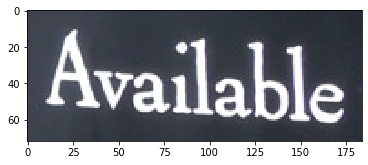

In [20]:
plt.imshow(Image.open(image_path))